# Uploading CSV from previous EDA

In [1]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

Saving Preprocessing.csv to Preprocessing.csv


In [55]:
from google.colab import files

path = "/content/Preprocessing.csv"
df = pd.read_csv(path)


# Preprocessing

In [56]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


## Convert avg_glucose_level

In [57]:
df['avg_glucose_level'].astype('object')
for i, j in zip(df['avg_glucose_level'], df['avg_glucose_level'].index) :
    if i < 70 :
        df.loc[j, 'avg_glucose_level'] = 'Low'
    elif i>=70 and i<140 :
        df.loc[j, 'avg_glucose_level'] = 'Normal'
    elif i>=140 and i<200:
      df.loc[j, 'avg_glucose_level'] = 'Little High'
    else:
        df.loc[j, 'avg_glucose_level'] = 'High'

In [58]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,High,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,High,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,Normal,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,Little High,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,Little High,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,Normal,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,Normal,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,Normal,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,Little High,25.600000,formerly smoked,0


## Spliting Features and Target

In [69]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

## Label Encoding the "Gender" column

In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])

## Label Encoding the "ever married"

In [71]:
X[:, 4] = le.fit_transform(X[:, 4])

## Label Encoding the "Recidence Type"

In [72]:
X[:, 6] = le.fit_transform(X[:, 6]) # Urban = 1, Rural = 0

## Hot one encoding "Smoking Status"

In [74]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [9])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

## Hot one encoding "Average Glucose Level"

In [78]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [11])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

## Hot one encoding "Work type"

In [81]:

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [13])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,67,0,1,1,1,36.6
1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,61,0,0,1,0,28.8932
2,0,0,1,0,0,0,0,0,1,0,0,1,0,1,80,0,1,1,0,32.5
3,0,0,1,0,0,0,1,0,0,0,0,0,1,0,49,0,0,1,1,34.4
4,0,0,0,1,0,0,1,0,0,0,0,1,0,0,79,1,0,1,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,0,1,0,0,0,0,0,1,0,0,1,0,0,80,1,0,1,1,28.8932
5106,0,0,0,1,0,0,0,0,1,0,0,1,0,0,81,0,0,1,1,40
5107,0,0,0,1,0,0,0,0,1,0,0,1,0,0,35,0,0,1,0,30.6
5108,0,0,1,0,0,0,1,0,0,0,1,0,0,1,51,0,0,1,0,25.6


Note:

working type 0 - 4 

average glucose 5 - 8 

smoking status 9 - 12 

gender 13 

age 14

hypertension 15

heart disease 16

ever married 17

recidence 18

bmi 19

## Splitting the dataset into the Training set and Test set

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [96]:
X_train.shape

array([[-0.38217943, -0.06833339, -1.14895205, ...,  0.72286416,
        -1.01677473, -0.11992313],
       [ 2.61657202, -0.06833339, -1.14895205, ...,  0.72286416,
         0.98350202, -0.86234122],
       [-0.38217943, -0.06833339,  0.87035834, ...,  0.72286416,
        -1.01677473, -0.77116707],
       ...,
       [-0.38217943, -0.06833339,  0.87035834, ...,  0.72286416,
        -1.01677473,  0.86996766],
       [-0.38217943, -0.06833339,  0.87035834, ...,  0.72286416,
        -1.01677473,  3.39679416],
       [-0.38217943, -0.06833339,  0.87035834, ...,  0.72286416,
        -1.01677473,  1.35188818]])

In [87]:
X_test.shape

(1022, 20)

In [88]:
Y_train.shape

(4088,)

In [90]:
Y_test.shape

(1022,)

## Feature Scalling

In [91]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model

In [100]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc') is not None and logs.get('acc') >= 0.8):
      print("\nReached 80% accuracy so cancelling training!")
      self.model.stop_training = True

In [106]:
import tensorflow as tf

callbacks = myCallback()

model = tf.keras.models.Sequential([
              tf.keras.layers.Dense(units=16, activation='relu'),
              tf.keras.layers.Dense(units=32, activation='relu'),
              tf.keras.layers.Dense(units=1, activation='sigmoid')
                                    
])

In [107]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

In [108]:
history = model.fit(X_train, Y_train, batch_size = 32, epochs = 100, validation_data=(X_test, Y_test))

Epoch 1/100
128/128 [==============================] - 1s 3ms/step - loss: 0.4588 - acc: 0.8681 - val_loss: 0.2210 - val_acc: 0.9413
Epoch 2/100
128/128 [==============================] - 0s 2ms/step - loss: 0.1896 - acc: 0.9490 - val_loss: 0.2080 - val_acc: 0.9413
Epoch 3/100
128/128 [==============================] - 0s 2ms/step - loss: 0.1715 - acc: 0.9539 - val_loss: 0.2005 - val_acc: 0.9413
Epoch 4/100
128/128 [==============================] - 0s 2ms/step - loss: 0.1582 - acc: 0.9532 - val_loss: 0.1969 - val_acc: 0.9413
Epoch 5/100
128/128 [==============================] - 0s 2ms/step - loss: 0.1662 - acc: 0.9500 - val_loss: 0.1953 - val_acc: 0.9413
Epoch 6/100
128/128 [==============================] - 0s 2ms/step - loss: 0.1528 - acc: 0.9548 - val_loss: 0.1957 - val_acc: 0.9413
Epoch 7/100
128/128 [==============================] - 0s 2ms/step - loss: 0.1641 - acc: 0.9502 - val_loss: 0.1941 - val_acc: 0.9413
Epoch 8/100
128/128 [==============================] - 0s 2ms/step - 

In [113]:
model.evaluate(X_test, Y_test)

32/32 [==============================] - 0s 978us/step - loss: 0.2413 - acc: 0.9344


[0.24131056666374207, 0.9344422817230225]

Text(0.5, 1.0, 'Training and validation loss')

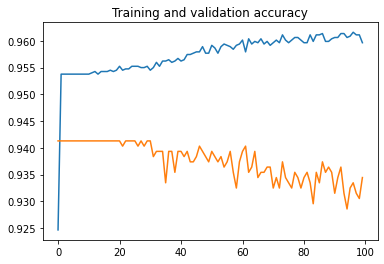

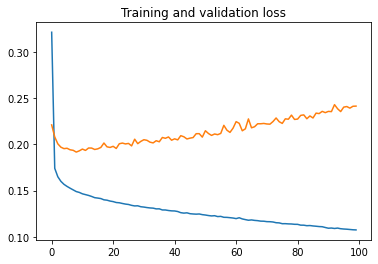

In [115]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )